In [1]:
import torch
import math
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
import random
from IPython import display
from plot_lib import plot_data, plot_model, set_default

In [2]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 50  # num_hidden_units

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # init the device (gpu or cpu)

In [4]:
# initialize the input and output
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1  

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


In [5]:
# def an style for plot
set_default();

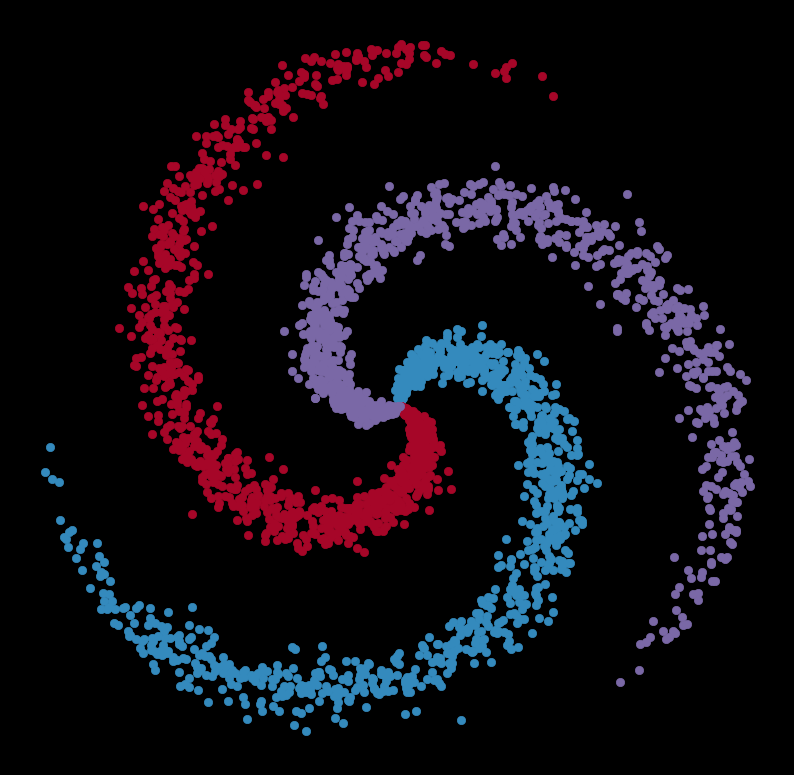

In [8]:
# Plot the inputs
import matplotlib.pyplot as plt
plt.scatter(X[0:1000,0].cpu(),X[0:1000,1].cpu())
plt.scatter(X[1000:2000,0].cpu(),X[1000:2000,1].cpu())
plt.scatter(X[2000:3000,0].cpu(),X[2000:3000,1].cpu())
plt.axis("off")
plt.show()

In [9]:
# initialize learning rate and lambda l2 (l2 regularization)
learning_rate = 1e-2
lambda_l2 = 1e-5

In [11]:
model = nn.Sequential(nn.Linear(D, H),  # init the model with 2 linear layer (no activation function)
                      nn.Linear(H, C))

model.to(device)

loss = nn.CrossEntropyLoss()    # init loss function (cross-entropy function)
optimizer = torch.optim.SGD(model.parameters(),    # Adam optimizer algorithm
                             lr = learning_rate,
                             weight_decay= lambda_l2)   
# optimizer = torch.optim.SGD(model.parameters(),   # SGD optimizer algorithm
#                             lr = learning_rate,
#                             weight_decay= lambda_l2)

epochs = 100

# in here we calculate all output but in sgd we do not need them!
# we can change the code for making beter in time (every epoch calculate on sample forward cuz we use sgd)

for i in range(epochs):   # EPOCHS

    y_pred = model(X)   # predics outputs
    loss_o = loss(y_pred, y)    # calculate loss function
    print(y_pred.size())
    score, predicted = torch.max(y_pred, 1) 
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (i, loss_o.item(), acc))
    display.clear_output(wait=True)

    optimizer.zero_grad()   # zero the grad (if we do not it grad will be = last grad + this grad)

    loss_o.backward()   # calculate the gradient and partial derivative backward with chain rule

    optimizer.step()    # single optimize for our model

torch.Size([3000, 3])
[EPOCH]: 99, [LOSS]: 0.964289, [ACCURACY]: 0.510


Sequential(
  (0): Linear(in_features=2, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=3, bias=True)
)


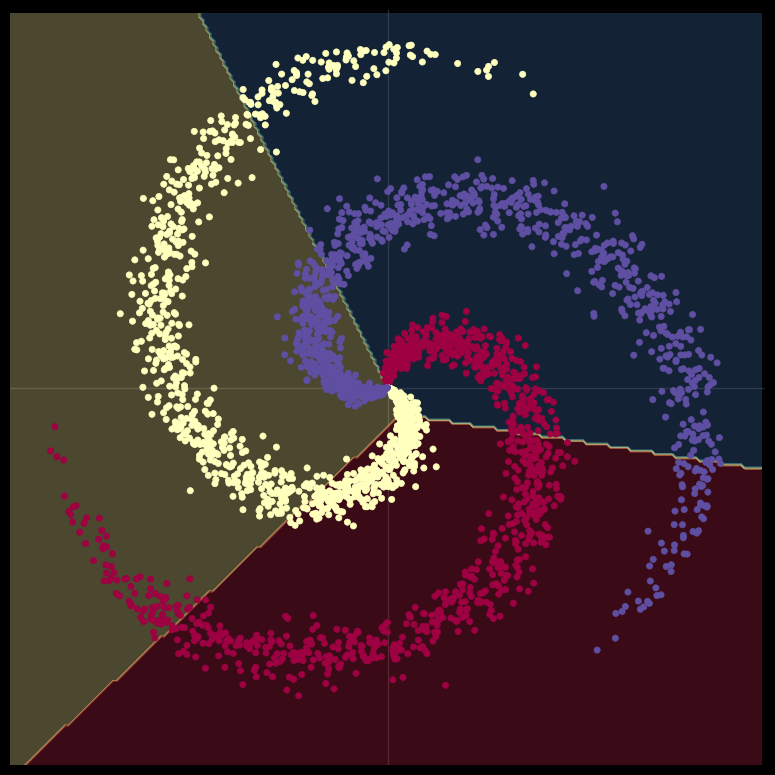

In [12]:
print(model)
plot_model(X, y, model) # print the decision boundary of our model

In [13]:
learning_rate = 1e-2
lambda_l2 = 1e-4

In [14]:

model = nn.Sequential(
    nn.Linear(D, 50),
    nn.ReLU(),
    nn.Linear(50,C),
    
)
model.to(device)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= lambda_l2)

epochs = 1000

for i in range(epochs):

    y_pred = model(X)
    loss_o = loss(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (i, loss_o.item(), acc))
    display.clear_output(wait=True)

    optimizer.zero_grad()

    loss_o.backward()

    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.030761, [ACCURACY]: 0.999


Sequential(
  (0): Linear(in_features=2, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=3, bias=True)
)


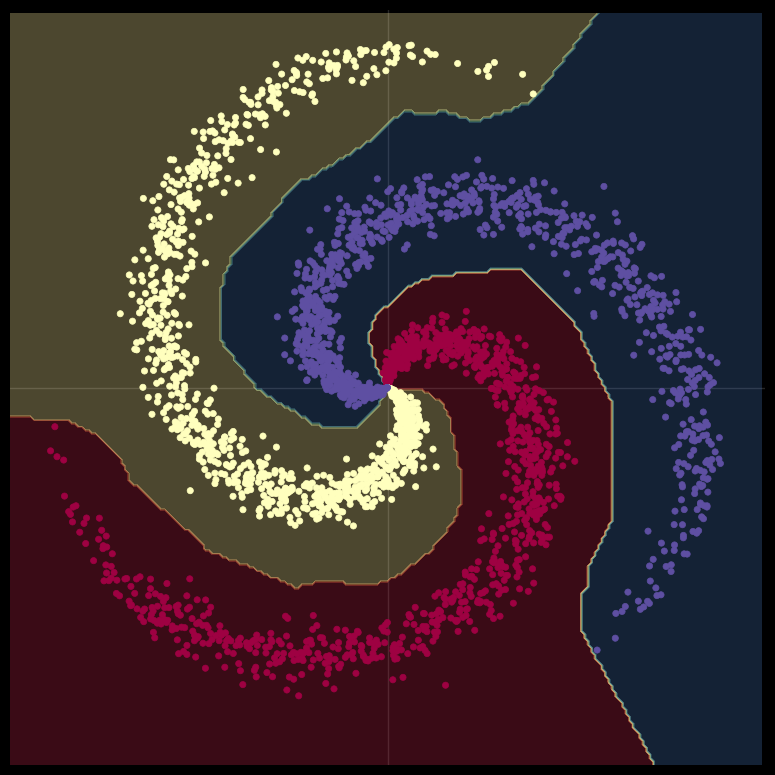

In [15]:
print(model)
plot_model(X, y, model)